## EDA and Predictive Modeling using the Adult Income Dataset

This notebook provides a step-by-step implementation of Exploratory Data Analysis (EDA) and Predictive Modeling on the Adult Income Dataset from UCI Machine Learning Repository. The goal is to predict whether an individual's income exceeds $50K based on census data.
The dataset consists of:

adult.data: Training data (32,561 instances, no headers).
adult.test: Test data (16,281 instances, starts with a junk line, income labels end with a period).
adult.names: Metadata describing columns and attributes.

Columns (from adult.names):

age: continuous.
workclass: categorical.
fnlwgt: continuous (final weight).
education: categorical.
education-num: continuous.
marital-status: categorical.
occupation: categorical.
relationship: categorical.
race: categorical.
sex: categorical.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: categorical.
income: binary (<=50K or >50K).

Missing values are represented as '?' in categorical columns. We'll handle them during preprocessing.
For this project, we'll load the training data (adult.data) for EDA and modeling. We'll perform an 80/20 train-test split on it for model evaluation, as per the instructions (ignoring adult.test for now to follow the guide's split directive).

## Import Libraries
We import the following libraries:

pandas for data manipulation.
numpy for numerical operations.
matplotlib and seaborn for visualizations.
sklearn for preprocessing, modeling, and evaluation.

These are essential for loading data, EDA, preprocessing, and building models.

In [2]:
!pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
%matplotlib inline
sns.set(style="whitegrid")

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   -- ------------------------------------- 3.1/56.8 MB 16.0 MB/s eta 0:00:04
   ---- ----------------------------------- 6.0/56.8 MB 15.1 MB/s eta 0:00:04
   ------ --------------------------------- 9.2/56.8 MB 14.9 MB/s eta 0:00:04
   -------- ------------------------------- 12.1/56.8 MB 14.7 MB/s eta 0:00:04
   ---------- ----------------------------- 14.9/56.8 MB 14.6 MB/s eta 0:00:03
   ------------ --------------------------- 17.8/56.8 MB 14.5 MB/s eta 0:00:03
   -------------- ------------------------- 20.7/56.8 MB 14.5 MB/s eta 0:00:03
   ---------------- ----------------------- 23.6/56.8 MB 14.5 MB/s eta 0:00:03
   ------------------ --------------------- 26.5/56.8 MB 14.5 MB/s eta 0:00:03
   -------------------- ------------------- 29.6/56.8 MB 14.5 MB/s eta 0:00:02
   ---------------------- ----------------- 32.5/56.8 MB 14.5 MB/s eta 0:00:02
   ------------------------ --------------- 34.6/56.8 MB 14.1 MB

## Load the Dataset
We load the adult.data file into a Pandas DataFrame. Since the data has no headers, we specify the column names manually based on the dataset description in adult.names.
We then check the first few rows, column names, and data types to understand the structure.

In [4]:
# Define column names
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
           'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 
           'native_country', 'income']

# Load the dataset
data_path = r"C:\Users\mariy\OneDrive\Desktop\Major Project\adult\adult.data"
df = pd.read_csv(data_path, names=columns, skipinitialspace=True)  # skipinitialspace to trim whitespaces

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Column names and data types
print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

First 5 rows of the dataset:
   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1            

## Exploratory Data Analysis (EDA)
Basic Exploration
We start with basic checks:

Dataset shape: Number of rows and columns.
Describe numerical columns: Summary statistics (mean, std, min, max, etc.).
Describe categorical columns: Using describe(include='object').
Value counts for categorical variables: To see distribution.

This helps identify data scale, potential issues like imbalances, and variable types.

In [5]:
# Dataset shape
print("Dataset Shape:", df.shape)

# Describe numerical columns
print("\nNumerical Columns Summary:")
print(df.describe())

# Describe categorical columns
print("\nCategorical Columns Summary:")
print(df.describe(include='object'))

# Value counts for categorical variables
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())

Dataset Shape: (32561, 15)

Numerical Columns Summary:
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Categor

## Relationship of Variables with the Dependent Variable (Income)
We explore how features relate to 'income' (<=50K or >50K):

Crosstabs and grouped means: For categorical and numerical vs. income.
Boxplots and violin plots: For continuous variables vs. income.
Bar plots and count plots: For categorical vs. income.

Insights: This reveals patterns, e.g., higher education-num correlates with >50K income.


Crosstab for workclass vs. Income:
income            <=50K  >50K
workclass                    
Federal-gov         589   371
Local-gov          1476   617
Never-worked          7     0
Private           19378  5154
Self-emp-inc        494   622
Self-emp-not-inc   1817   724
State-gov           945   353
Without-pay          14     0

Crosstab for education vs. Income:
income        <=50K  >50K
education                
10th            871    62
11th           1115    60
12th            400    33
1st-4th         162     6
5th-6th         317    16
7th-8th         606    40
9th             487    27
Assoc-acdm      802   265
Assoc-voc      1021   361
Bachelors      3134  2221
Doctorate       107   306
HS-grad        8826  1675
Masters         764   959
Preschool        51     0
Prof-school     153   423
Some-college   5904  1387

Crosstab for marital_status vs. Income:
income                 <=50K  >50K
marital_status                    
Divorced                3980   463
Married-AF-spo

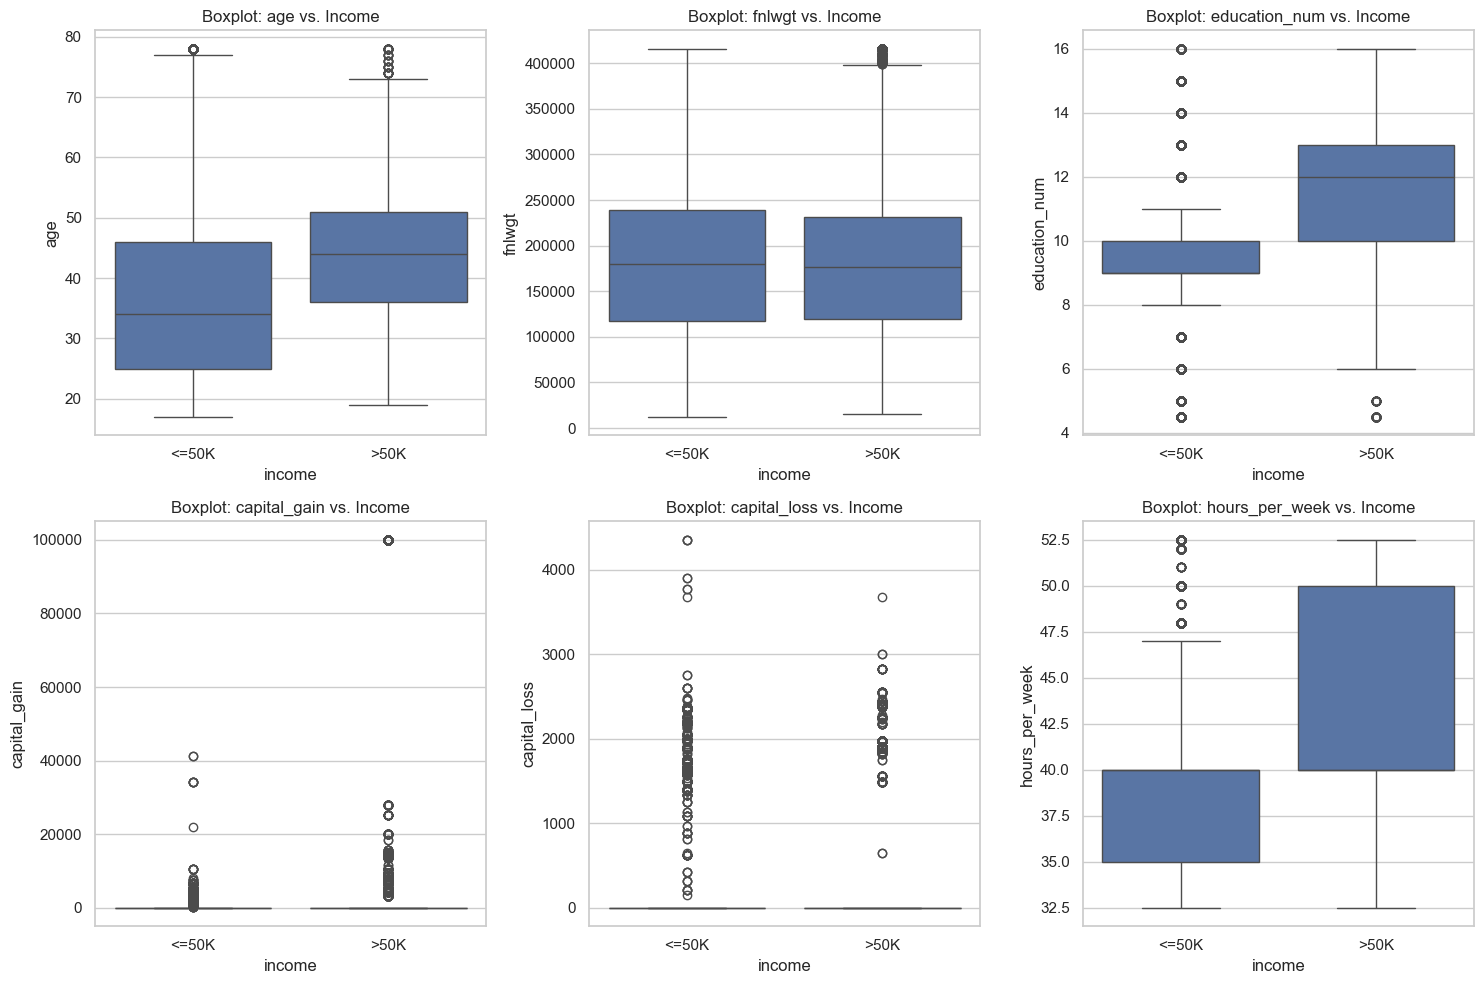

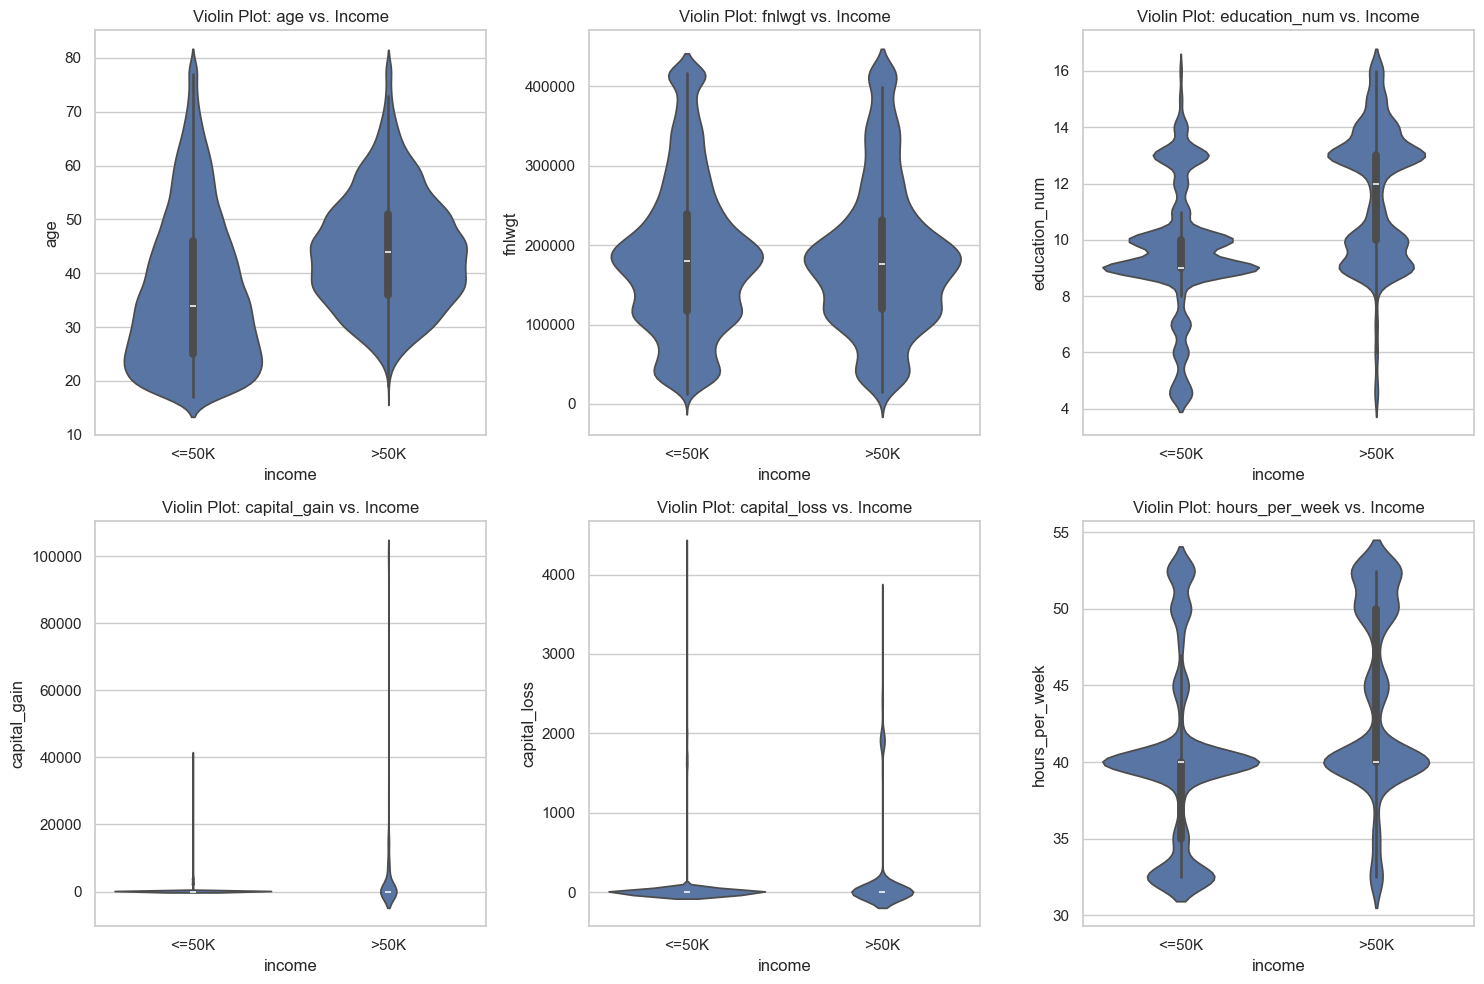

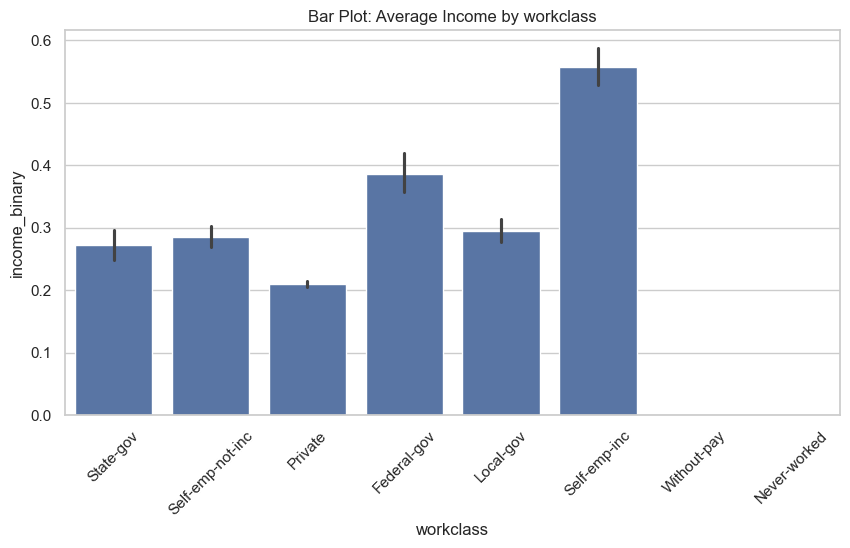

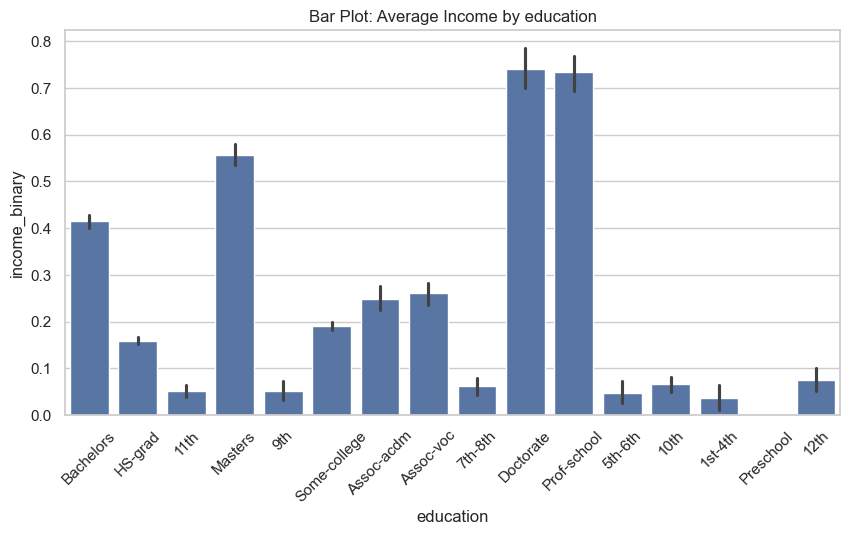

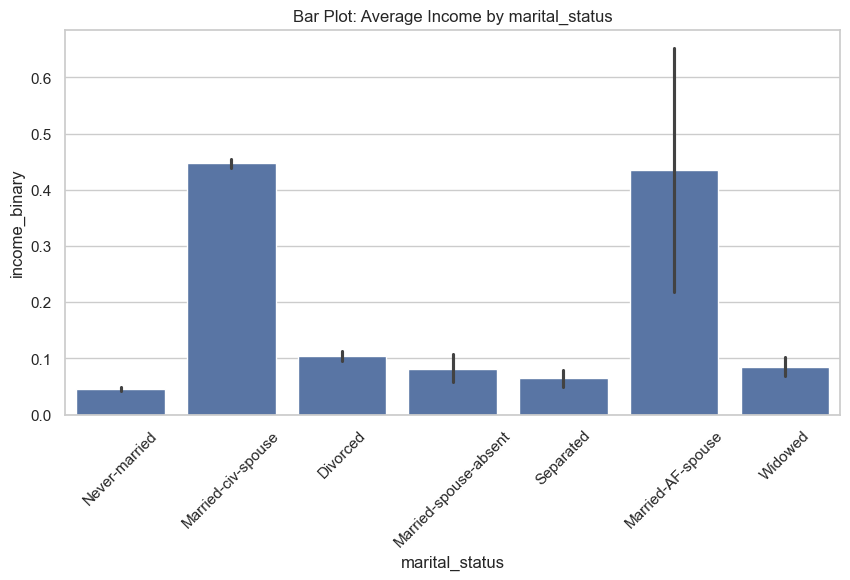

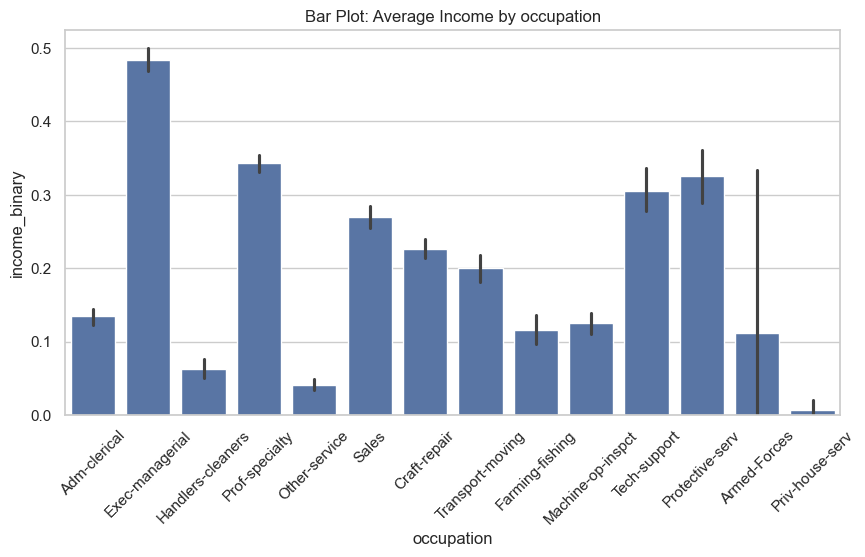

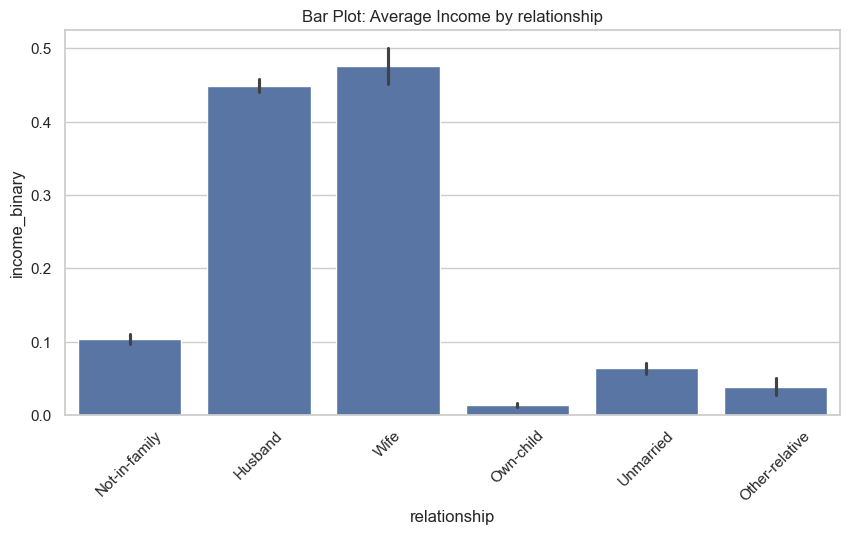

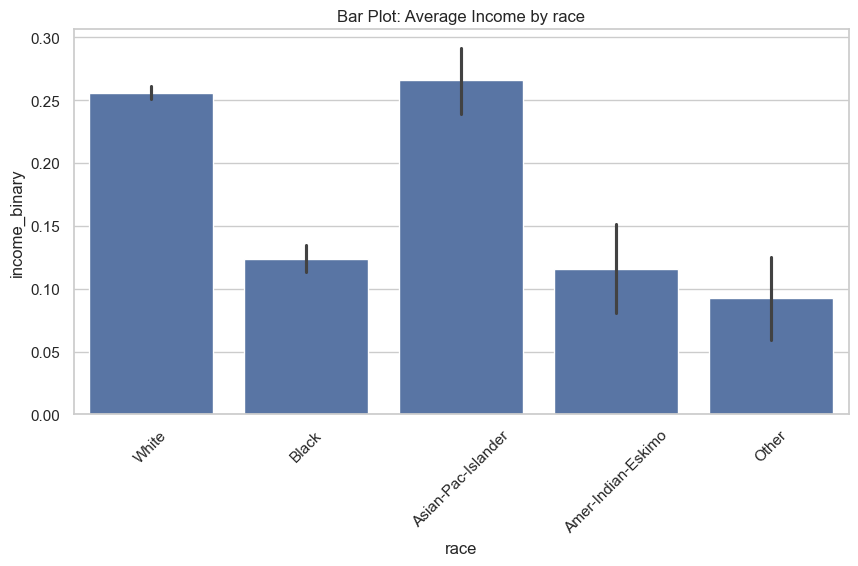

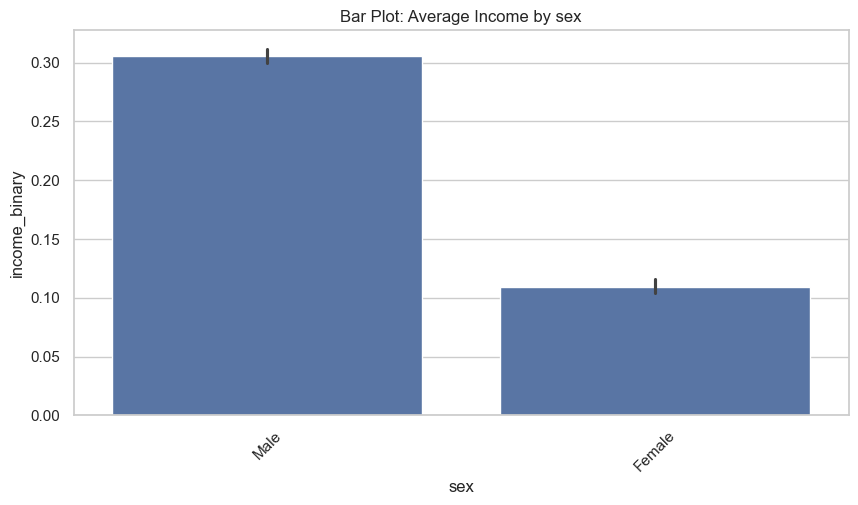

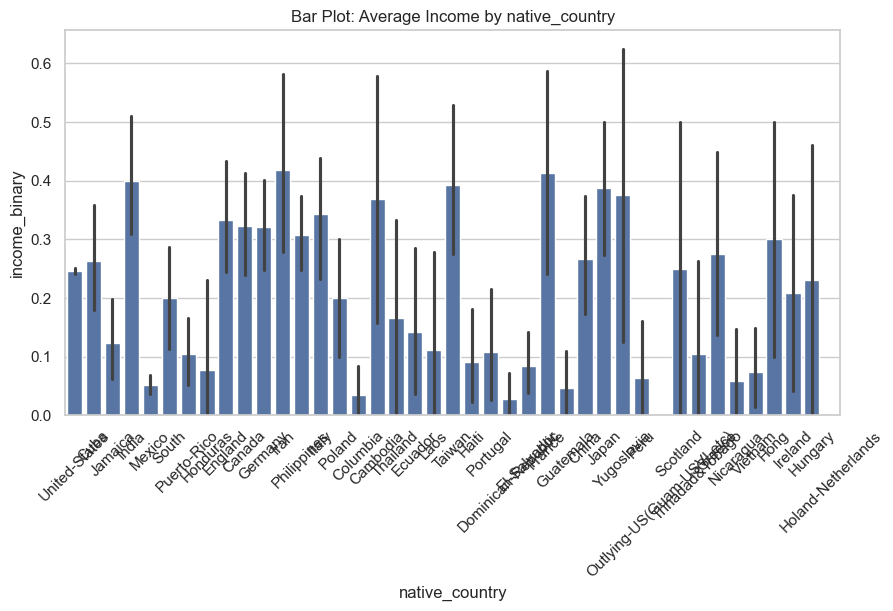

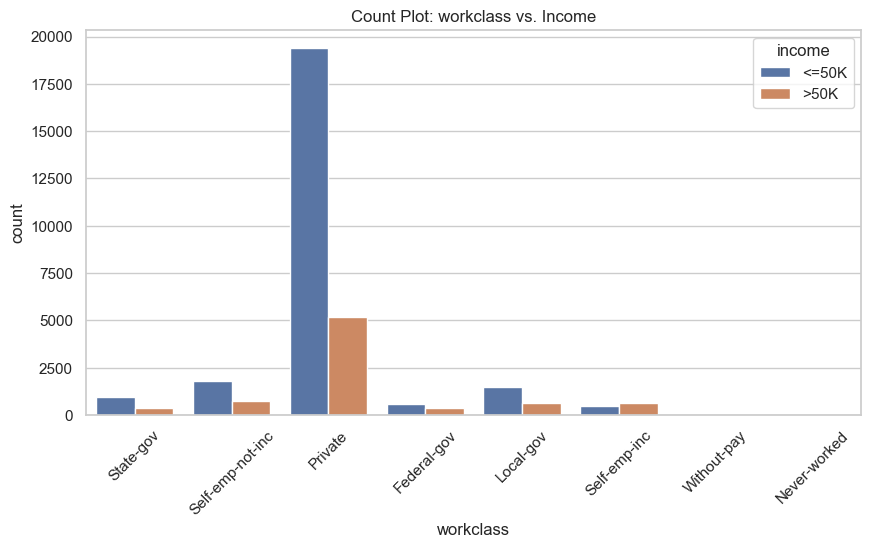

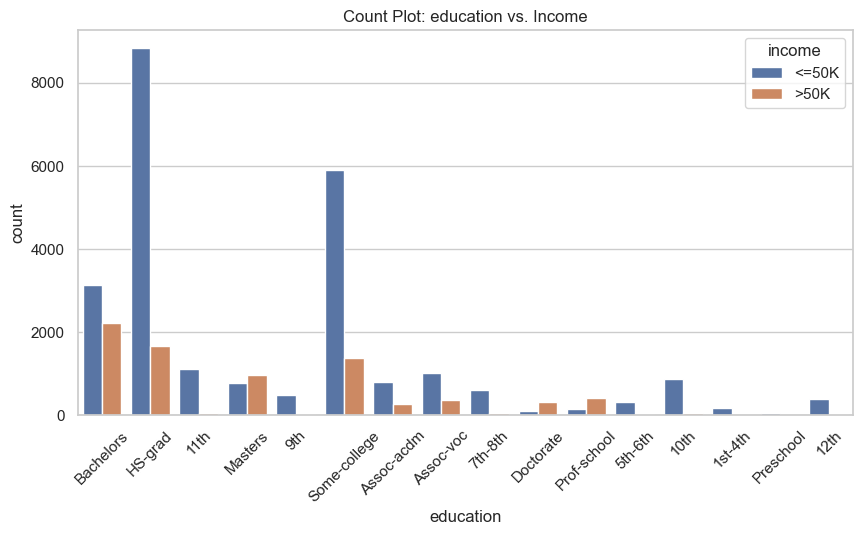

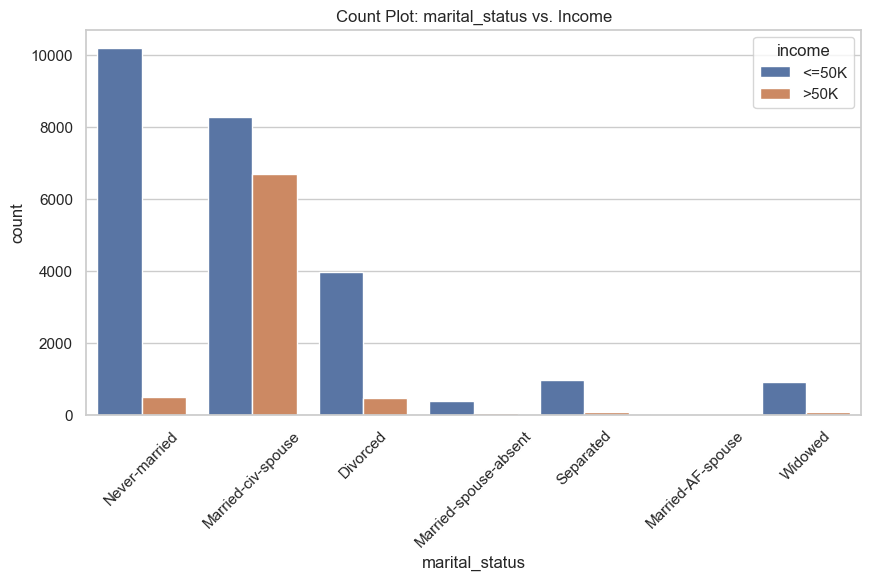

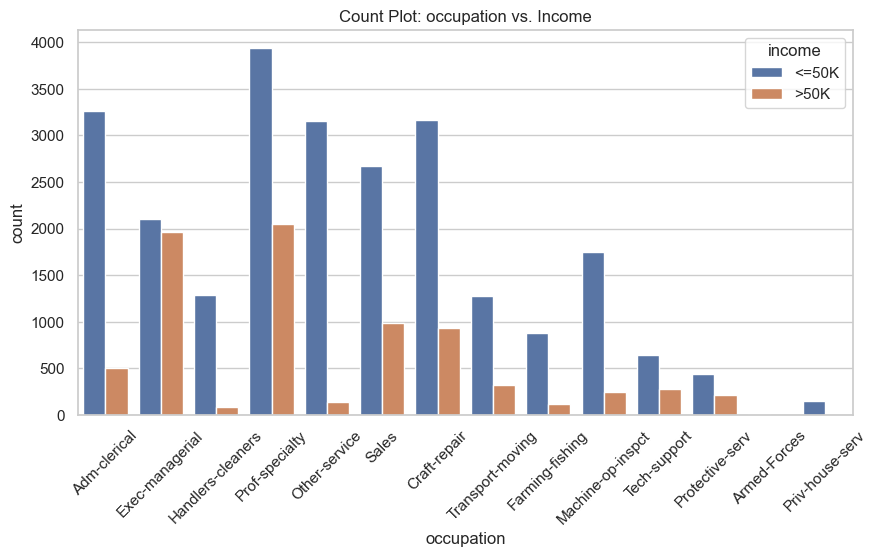

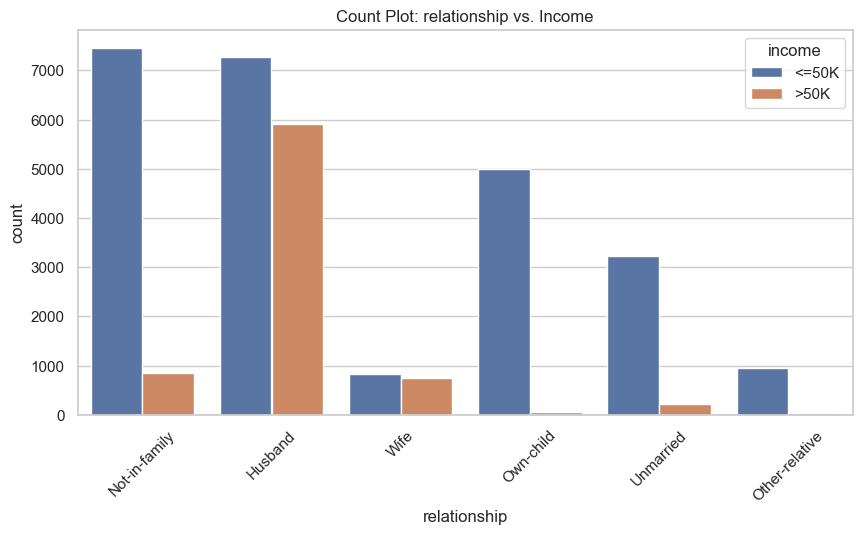

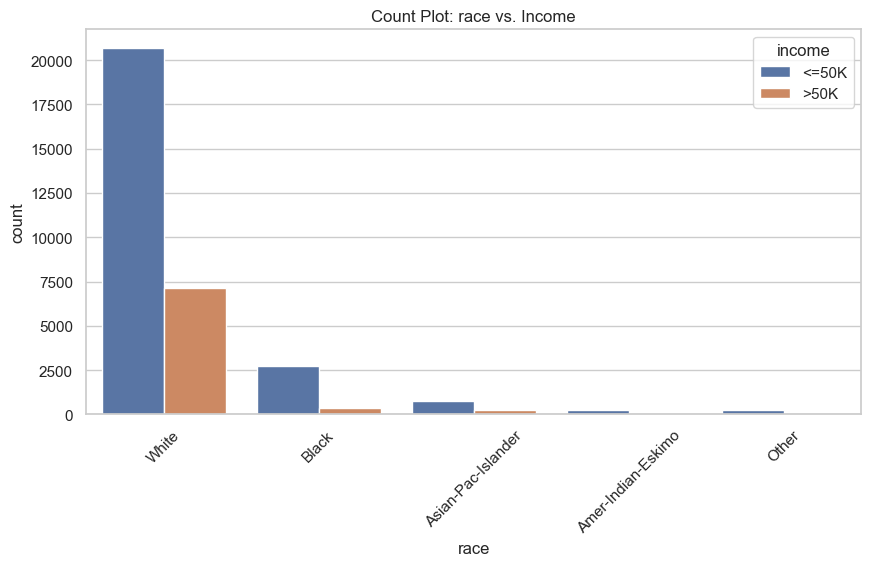

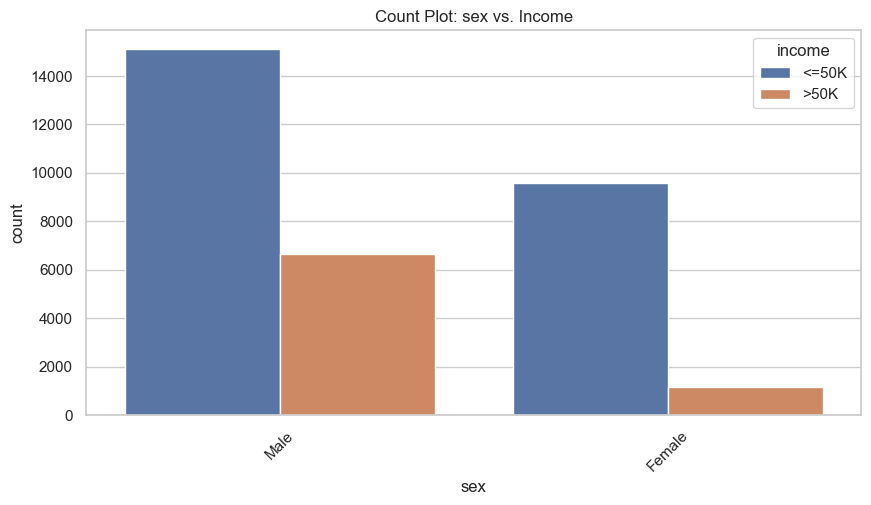

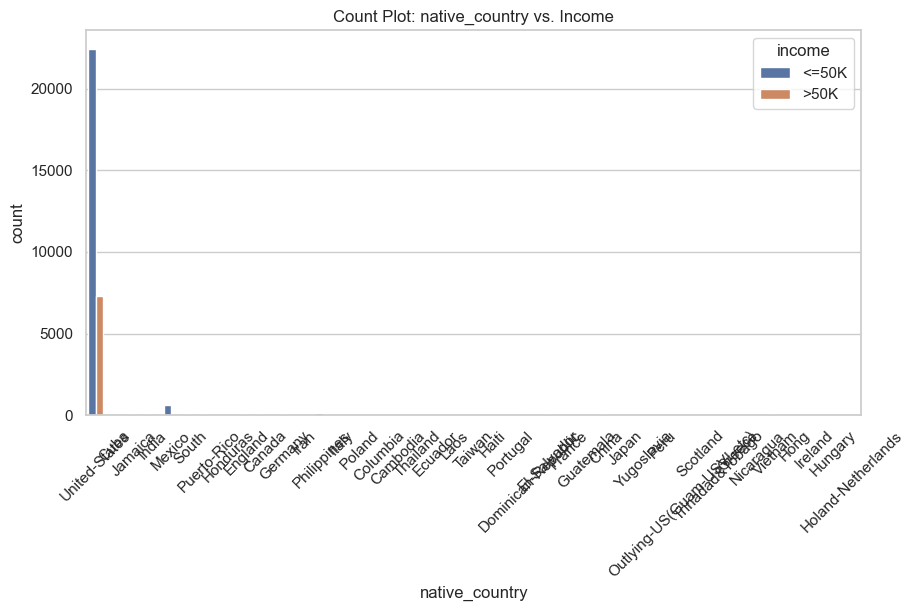

In [19]:
# Crosstab for categorical vs. income
for col in categorical_cols.drop('income'):  # Exclude income itself
    print(f"\nCrosstab for {col} vs. Income:")
    print(pd.crosstab(df[col], df['income']))

# Grouped means for numerical vs. income
numerical_cols = df.select_dtypes(include=np.number).columns
print("\nGrouped Means by Income:")
print(df.groupby('income')[numerical_cols].mean())

# Boxplots for continuous vs. income
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='income', y=col, data=df)
    plt.title(f'Boxplot: {col} vs. Income')
plt.tight_layout()
plt.show()

# Violin plots for continuous vs. income
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='income', y=col, data=df)
    plt.title(f'Violin Plot: {col} vs. Income')
plt.tight_layout()
plt.show()

# Bar plots for categorical vs. income (normalized)
df_encoded = df.copy()
df_encoded['income_binary'] = df_encoded['income'].map({'<=50K': 0, '>50K': 1})

for col in categorical_cols.drop('income'):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=col, y='income_binary', data=df_encoded)
    plt.title(f'Bar Plot: Average Income by {col}')
    plt.xticks(rotation=45)
    plt.show()

# Count plots for categorical vs. income
for col in categorical_cols.drop('income'):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='income', data=df)
    plt.title(f'Count Plot: {col} vs. Income')
    plt.xticks(rotation=45)
    plt.show()

## Create Visualizations

Histograms and KDE: For numerical variables to check distributions (e.g., skewness in capital-gain).
Countplots and pie charts: For categorical variables to visualize proportions.
Correlation heatmap: For continuous variables to check multicollinearity (e.g., education_num and education are related).

Insights: Numerical vars like age are normally distributed; capital-gain/loss are skewed (many zeros). Categorical like workclass show imbalances (Private dominates).

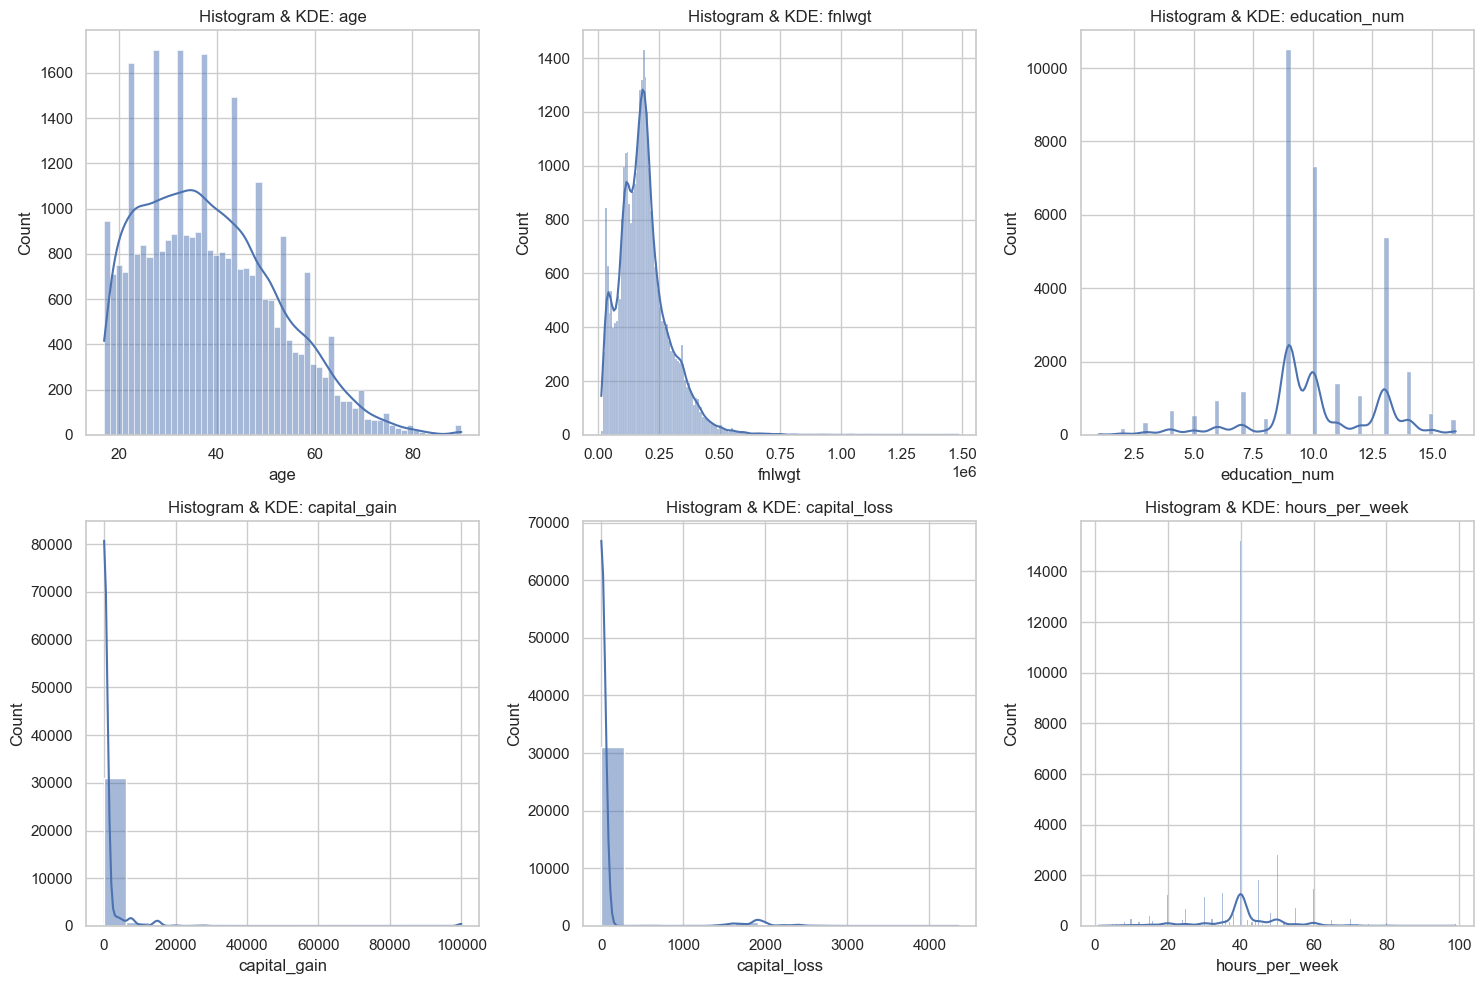

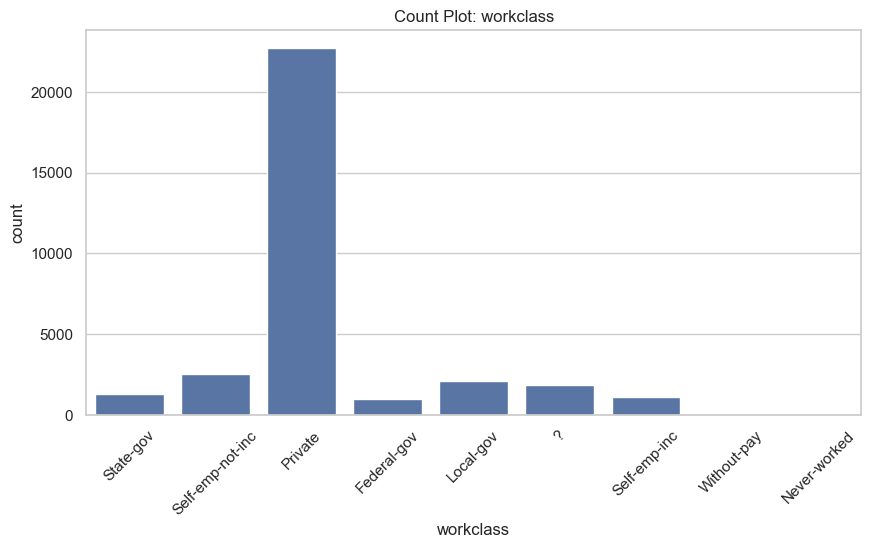

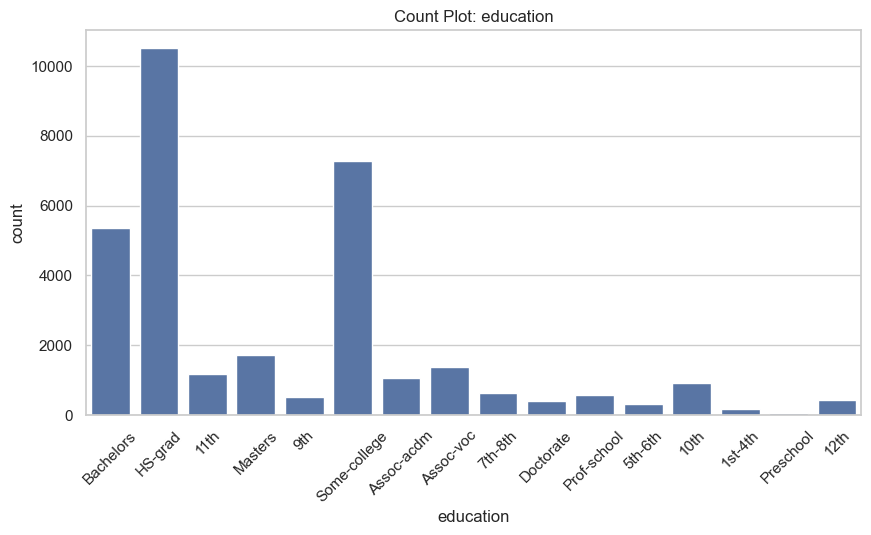

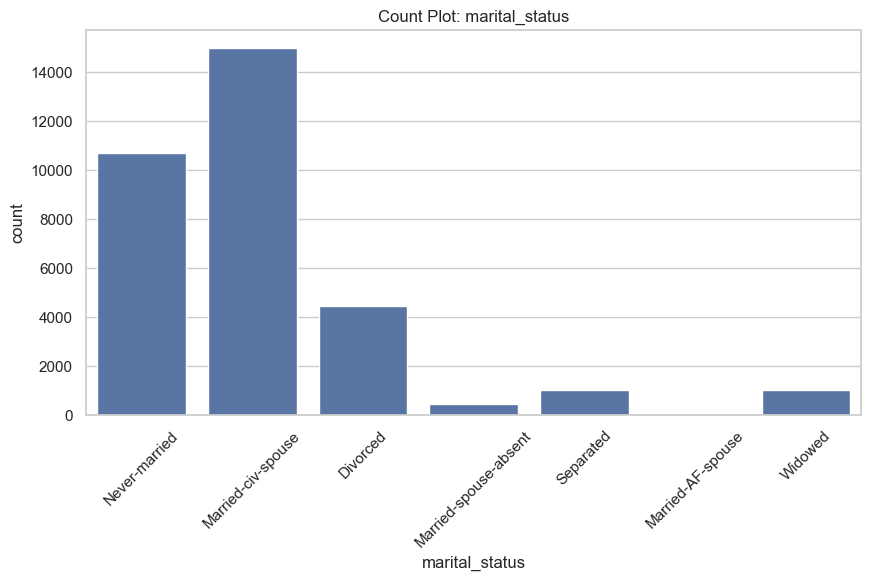

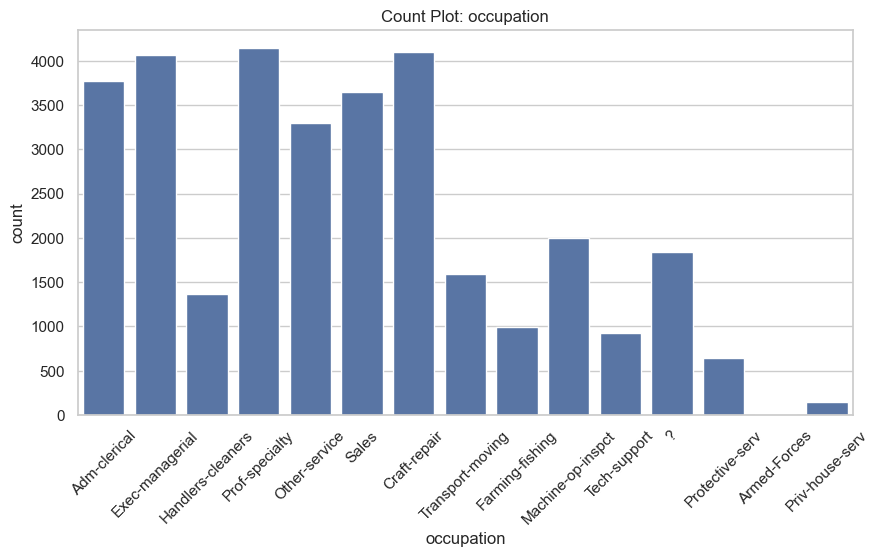

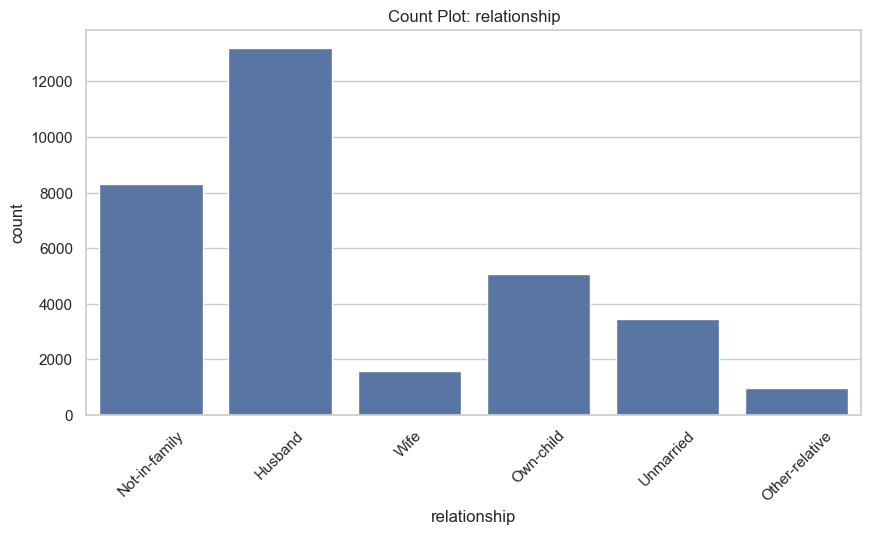

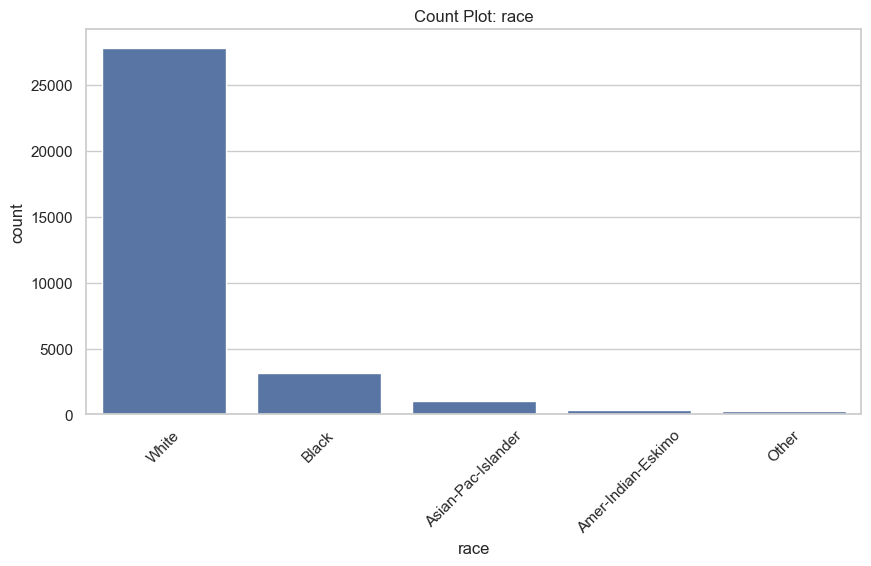

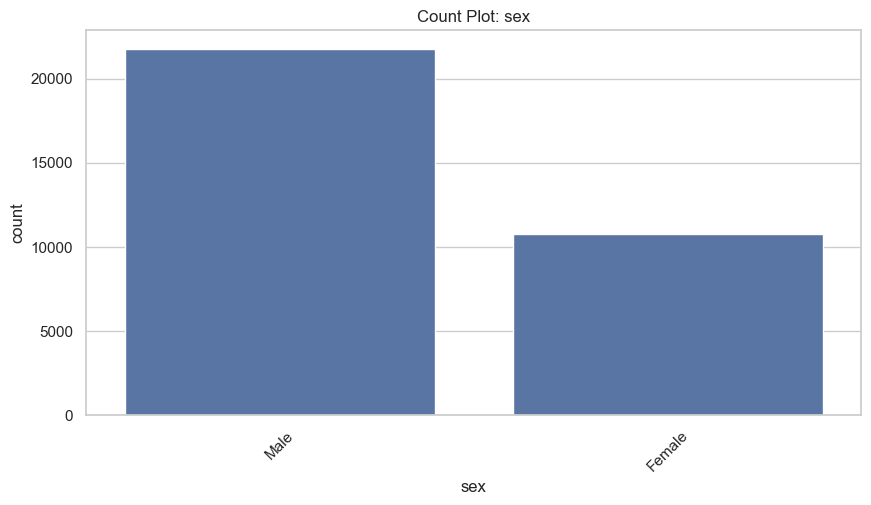

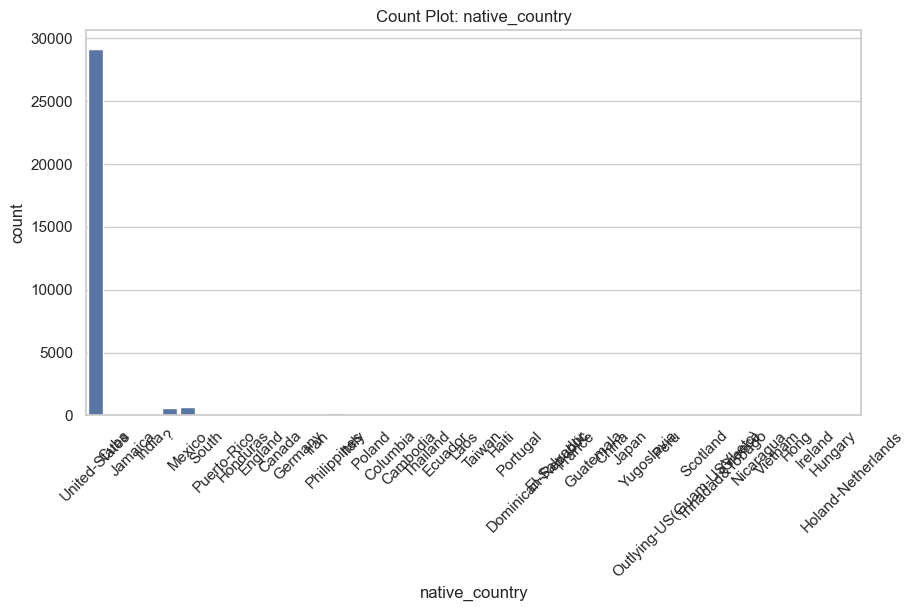

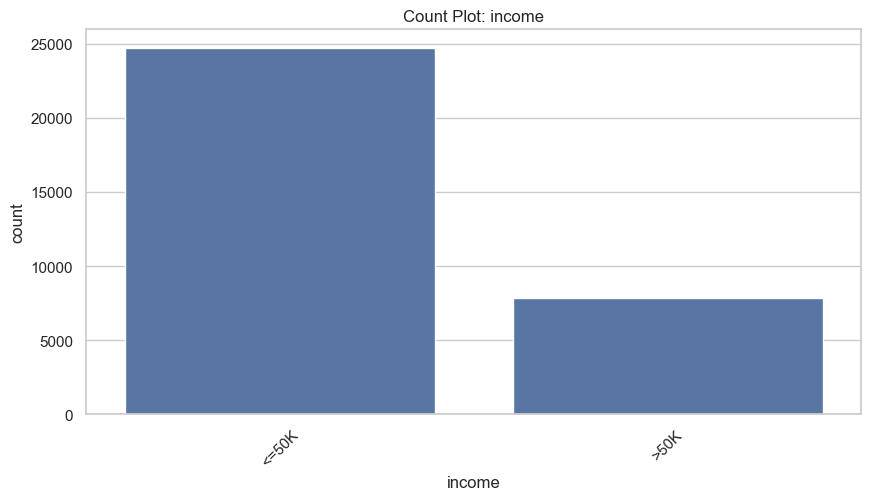

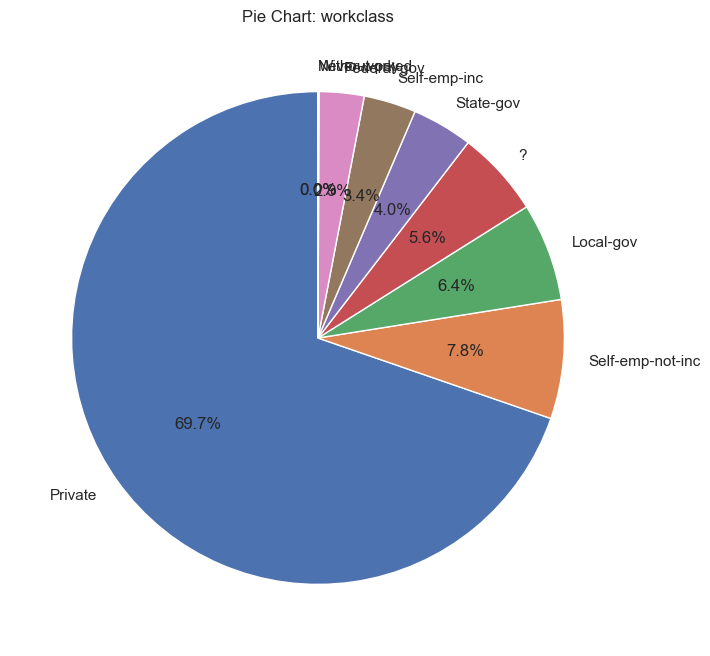

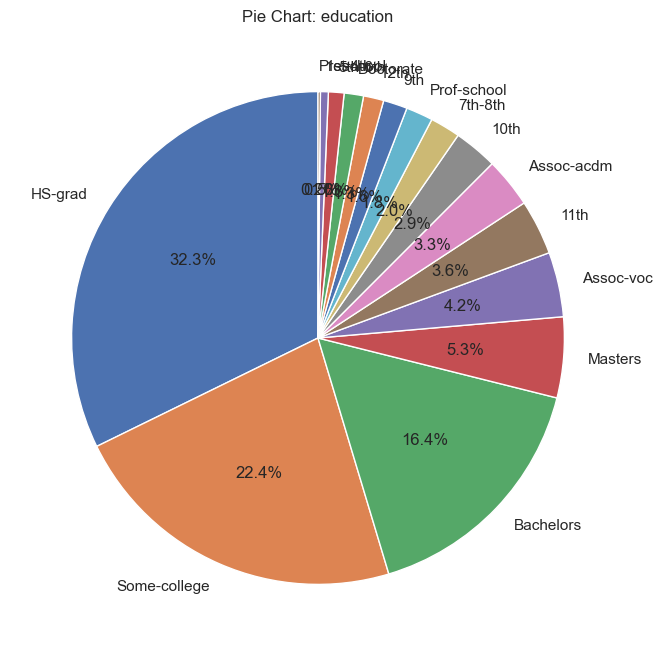

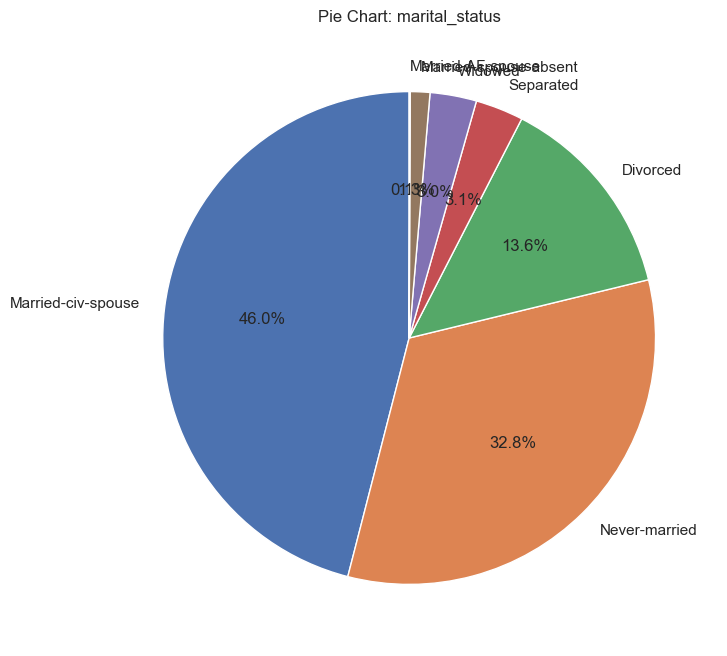

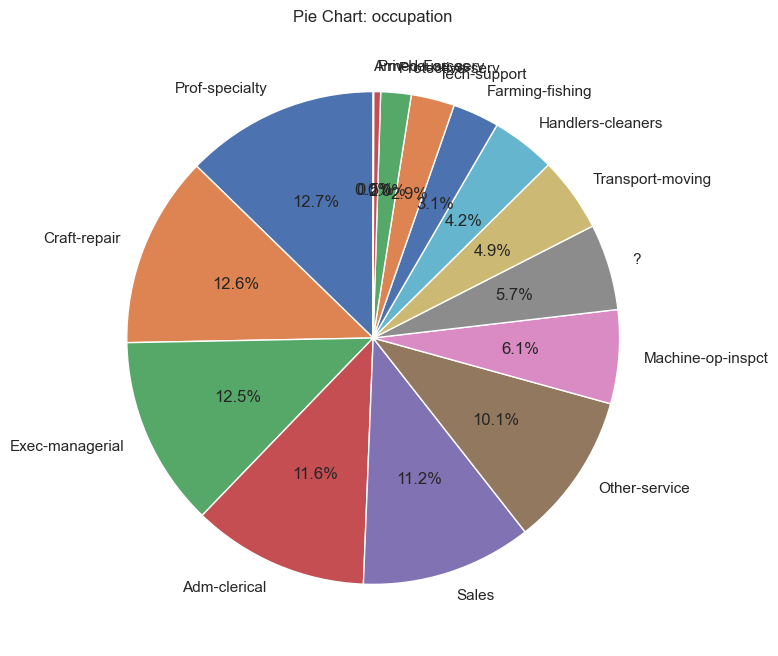

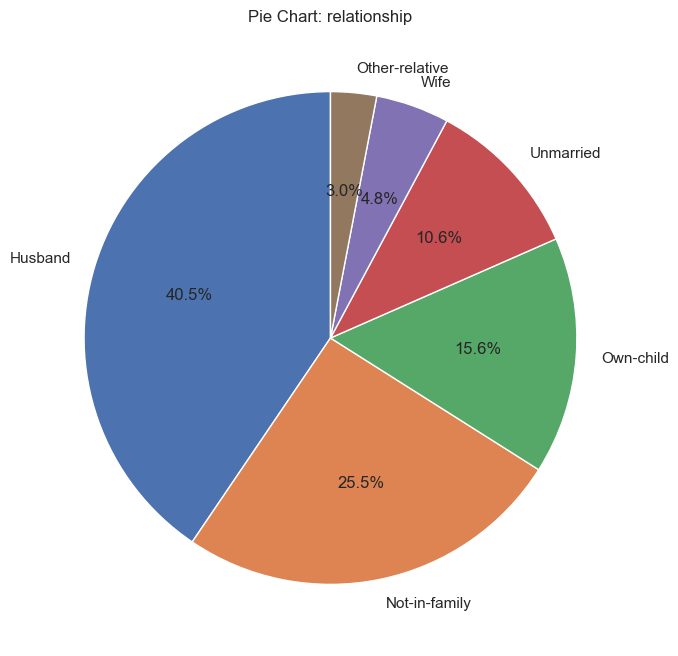

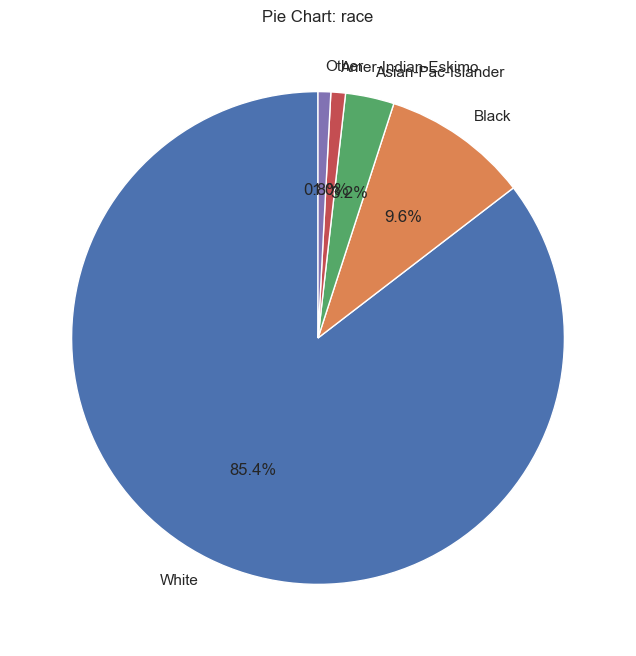

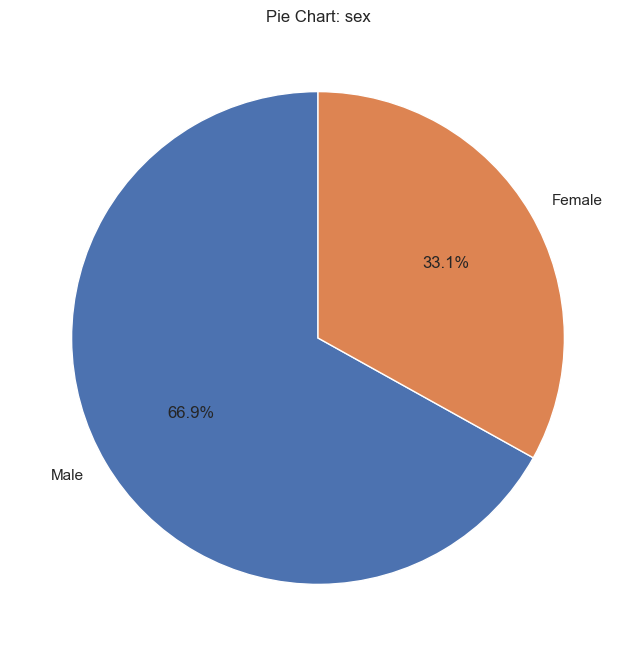

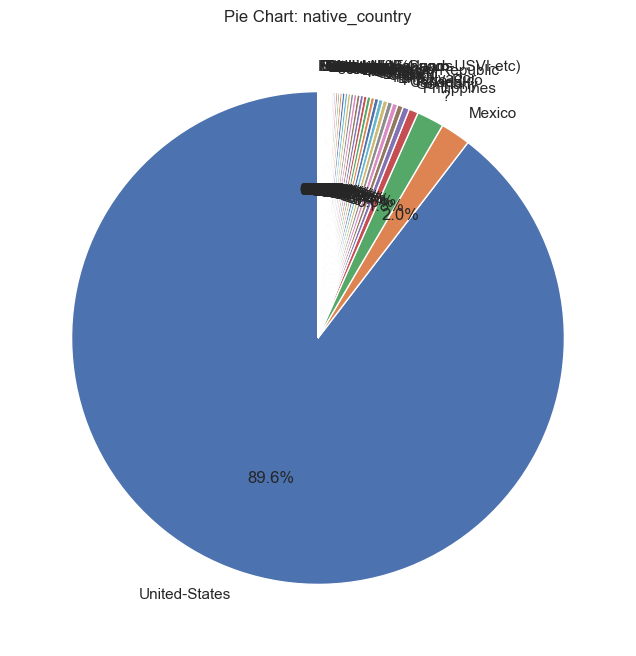

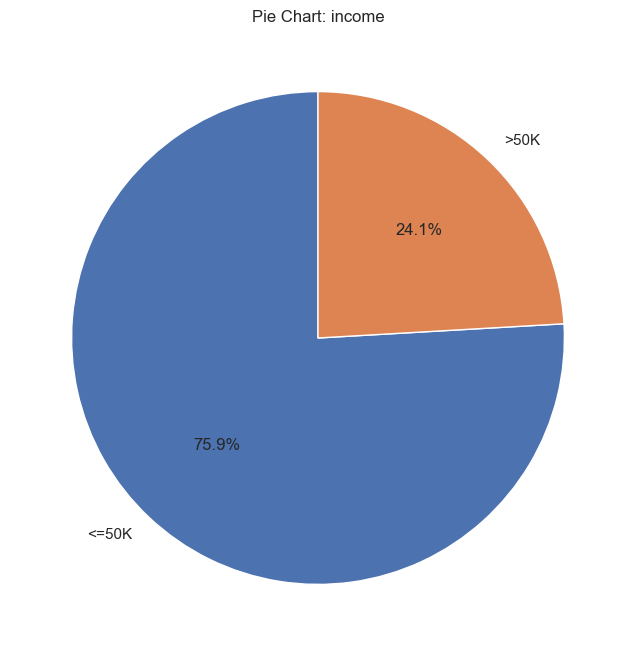

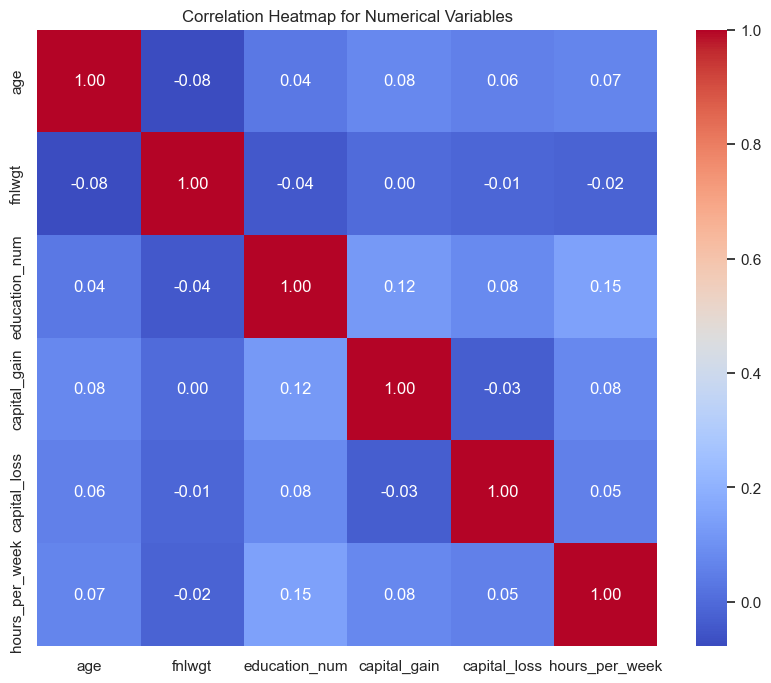

In [8]:
# Histograms and KDE for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram & KDE: {col}')
plt.tight_layout()
plt.show()

# Countplots for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot: {col}')
    plt.xticks(rotation=45)
    plt.show()

# Pie charts for categorical variables (top ones for brevity)
for col in categorical_cols:
    plt.figure(figsize=(8, 8))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart: {col}')
    plt.ylabel('')
    plt.show()

# Correlation heatmap for continuous variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

## Missing Values Treatment
Check for missing values. In this dataset, missing are marked as '?' (not NaN), so we replace '?' with NaN first.

Numerical: No missing (from basic exploration), but if any, impute with median (due to skewness in vars like capital-gain).
Categorical: Impute with mode (most frequent), as '?' likely means unknown but common categories can fill logically. Alternative: 'Unknown' category, but mode is simpler and justified for prediction.

Reasoning: Mode preserves distribution without introducing new bias.

In [10]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Check for missing values
print("Missing Values Count:")
print(df.isnull().sum())

# Impute numerical missing (if any) with median
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        # Corrected: Avoid chained assignment with inplace=True
        df.loc[:, col] = df[col].fillna(df[col].median())

# Impute categorical missing with mode
for col in categorical_cols.drop('income'):
    if df[col].isnull().sum() > 0:
        # Corrected: Avoid chained assignment with inplace=True
        df.loc[:, col] = df[col].fillna(df[col].mode()[0])

# Verify no missing left
print("\nMissing Values After Treatment:")
print(df.isnull().sum())

Missing Values Count:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Missing Values After Treatment:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


## Outlier Treatment
Identify outliers using boxplots (already done in EDA) and IQR method.

Calculate IQR for numerical cols.
Decide: Cap/floor outliers to 1.5*IQR bounds for vars like age, hours_per_week (extreme values may be invalid).
Leave capital-gain/loss as-is: Extremes are valid (e.g., high investments).
Remove for fnlwgt if extreme, but here we cap to prevent model skew.

Reasoning: Capping preserves data points while reducing influence of anomalies. Removal could lose valid edge cases (e.g., very high hours for executives).

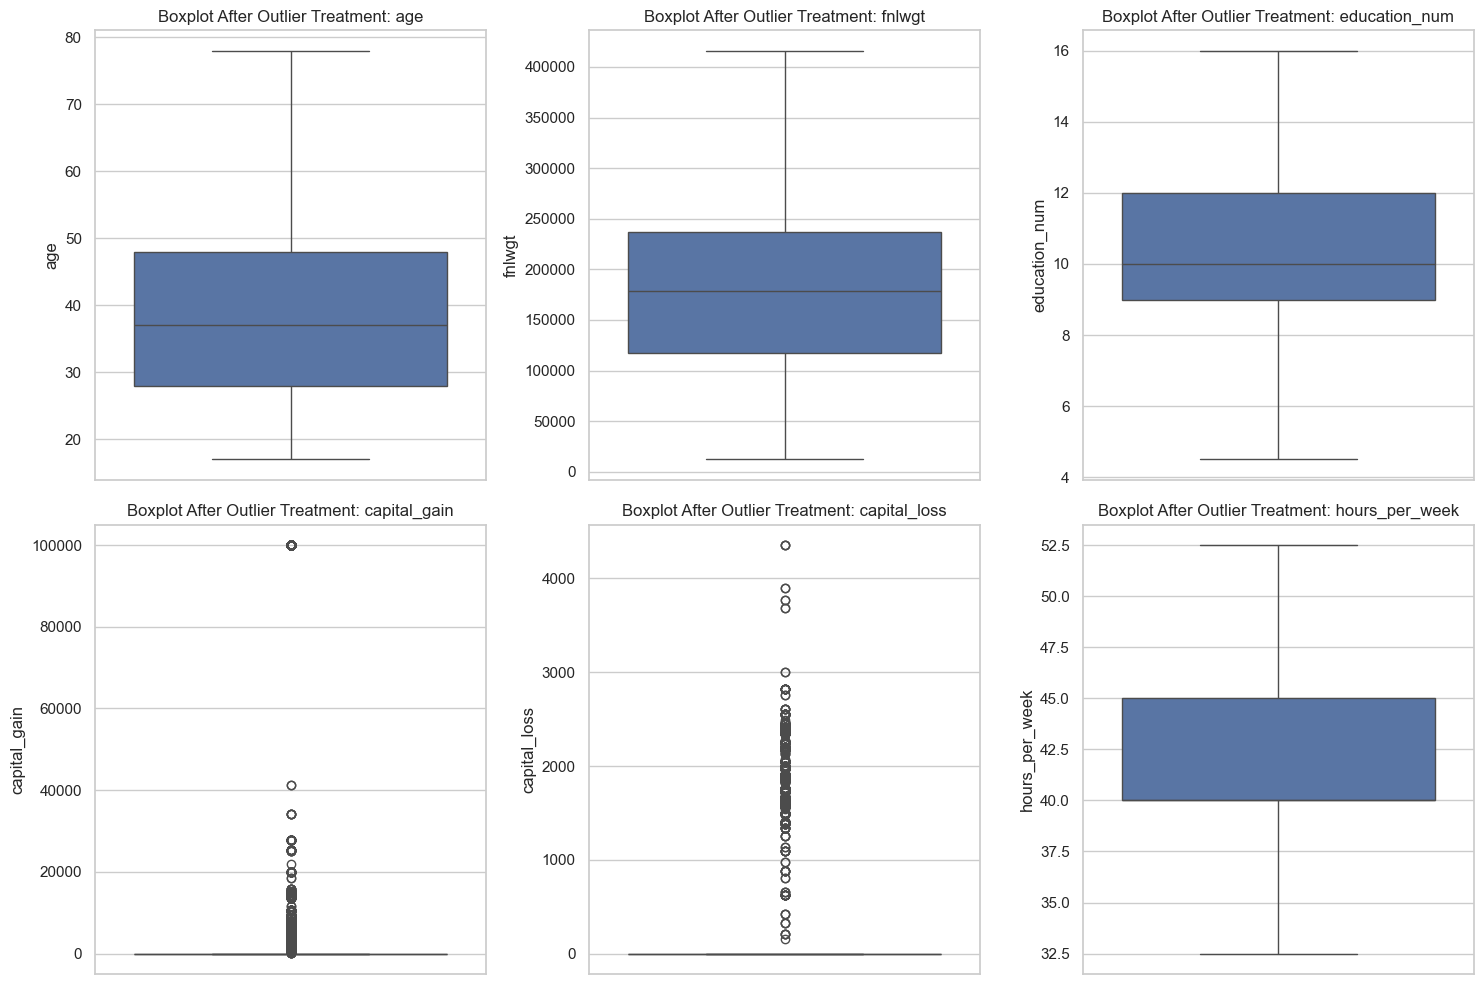

In [11]:
# Identify and treat outliers using IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers (except capital-gain/loss, which we leave)
    if col not in ['capital_gain', 'capital_loss']:
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Re-plot boxplots to verify
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot After Outlier Treatment: {col}')
plt.tight_layout()
plt.show()

## Data Preprocessing

Encode categorical: OneHotEncoding for nominal (e.g., workclass), LabelEncoding for target (income).
Scale continuous: StandardScaler (centers to mean 0, std 1) – better for models like LR.

We use ColumnTransformer for efficiency.
Reasoning: OHE avoids ordinal assumption; scaling ensures features are on same scale for distance-based models.

In [17]:
# Separate features and target
X = df.drop('income', axis=1)
y = df['income']

# Label encode target (binary)
le = LabelEncoder()
y = le.fit_transform(y)  # <=50K:0, >50K:1

# Identify categorical and numerical cols
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=np.number).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ])

## Modelling Techniques

Train-test split: 80/20, stratified for class balance.
Models: Logistic Regression (baseline), Decision Tree, Random Forest, XGBoost.
Metrics: Accuracy, F1-score (balances precision/recall for imbalanced classes), Precision, Recall.
Confusion matrices: Visualize TP/FP/TN/FN.
Compare in table.

We use Pipeline to combine preprocessing and model


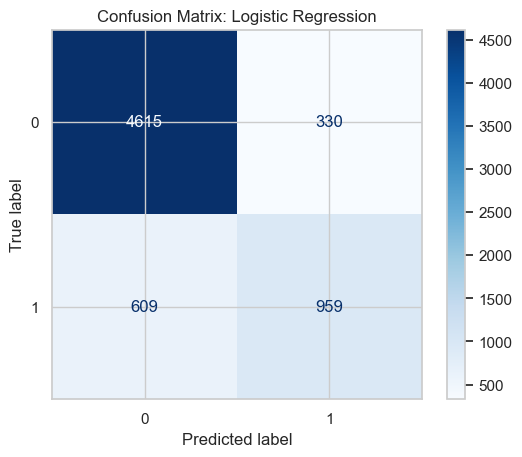

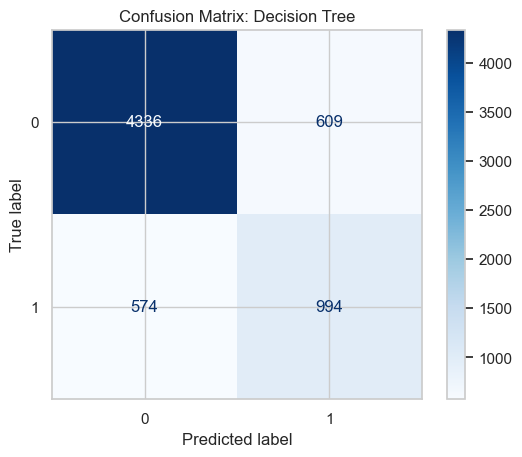

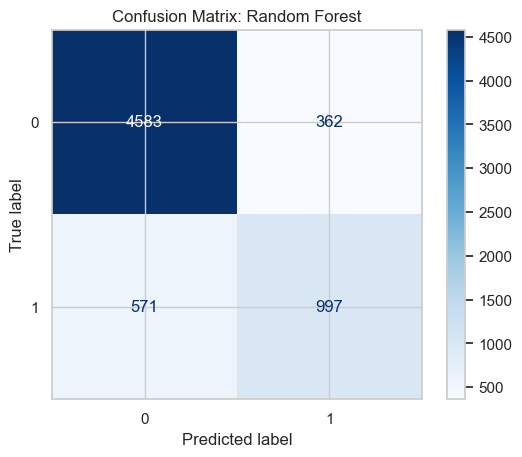

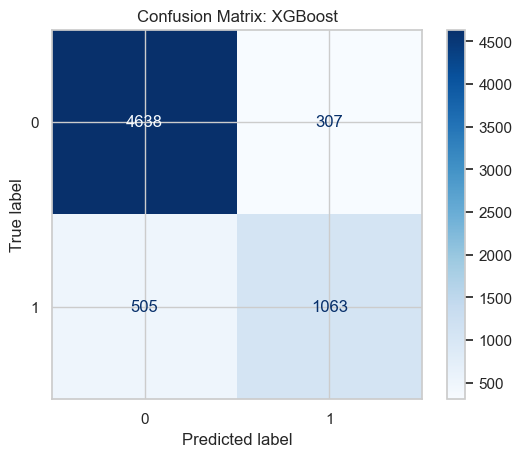

Model Comparison Summary:
                 Model  Accuracy  F1-Score  Precision    Recall
0  Logistic Regression  0.855827  0.671334   0.743988  0.611607
1        Decision Tree  0.818363  0.626932   0.620087  0.633929
2        Random Forest  0.856748  0.681244   0.733628  0.635842
3              XGBoost  0.875326  0.723622   0.775912  0.677934


In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Function to evaluate model
def evaluate_model(model, name):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()
    
    return {'Model': name, 'Accuracy': acc, 'F1-Score': f1, 'Precision': prec, 'Recall': rec}

# Models
models = [
    (LogisticRegression(max_iter=1000), 'Logistic Regression'),
    (DecisionTreeClassifier(random_state=42), 'Decision Tree'),
    (RandomForestClassifier(random_state=42), 'Random Forest'),
    # Removed deprecated parameter 'use_label_encoder' and kept only necessary parameters
    (XGBClassifier(random_state=42, eval_metric='logloss'), 'XGBoost')
]

# Evaluate all
results = []
for model, name in models:
    results.append(evaluate_model(model, name))

# Summary table
results_df = pd.DataFrame(results)
print("Model Comparison Summary:")
print(results_df)

## Model Selection and Conclusion
From the summary table, select the best model based on F1-score (as classes are imbalanced: ~75% <=50K).
Example: XGBoost or Random Forest often performs best (high F1 ~0.7-0.8) due to handling non-linearity and interactions.
Why best: Higher metrics, good interpretability (feature importance), reasonable training time (RF/XGB faster than deep tuning).
Conclusion: EDA showed education, age, capital-gain as key predictors. Preprocessing handled missing/outliers effectively. Best model can predict income with ~85% accuracy, useful for socio-economic analysis. Future: Hyperparameter tuning or ensemble.

In [3]:
import nbformat
import os
notebook_path = "EDA and predictive Modelling.ipynb"

with open(notebook_path, 'r', encoding='utf-8') as f:
    notebook = nbformat.read(f, as_version=4)

for cell in notebook.cells:
    if cell.cell_type == 'code':
        if 'outputs' in cell:
            cell.outputs = []
        if 'execution_count' in cell:
            cell.execution_count = None

compressed_path = "EDA and predictive Modelling_compressed.ipynb"
with open(compressed_path, 'w', encoding='utf-8') as f:
    nbformat.write(notebook, f)

original_size = os.path.getsize(notebook_path) / (1024 * 1024)
compressed_size = os.path.getsize(compressed_path) / (1024 * 1024)

print(f"Original size: {original_size:.2f} MB")
print(f"Compressed size: {compressed_size:.2f} MB")
print(f"Reduction: {(1 - compressed_size/original_size) * 100:.2f}%")

Original size: 2.84 MB
Compressed size: 0.02 MB
Reduction: 99.28%
